In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV


In [2]:
df = pd.read_csv('/content/diamonds.csv')

In [3]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Dataset Discription**

Key features include carat weight (0.2-5.01), cut quality (Fair to Ideal), color (D being the best), clarity (IF being the best), and dimensions (x, y, z in mm).  Price ranges from $326 to $18,823 and is influenced by these 4Cs.  Larger diamonds tend to have higher prices, with carat being a major determinant.  Cut quality also impacts price, with Ideal cuts generally commanding higher values. Colorless diamonds (closer to D) are rarer and typically more expensive.  Clarity, with fewer inclusions, also increases the price.




In [4]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds_data = df.drop(columns=['Unnamed: 0'])

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [9]:
df.describe()


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
catergorical_columns=['cut','color','clarity']
for i in catergorical_columns:
  encoder=LabelEncoder()
  df[i]=encoder.fit_transform(df[i])


<Axes: >

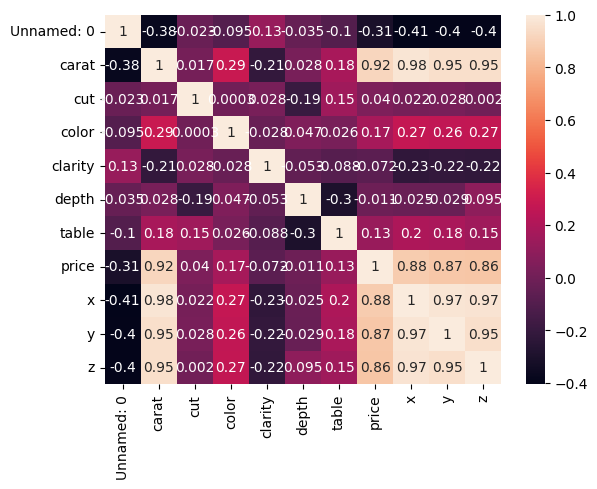

In [11]:
sns.heatmap(df.corr(),annot=True)

The heatmap shows strong positive correlations between carat weight, diamond dimensions (x, y, z), and price. Color also correlates positively with price, but more weakly.  A surprising negative correlation between clarity and price needs further investigation.  Cut, depth, and table show weak correlations with other variables.  Potential multicollinearity (carat, x, y, z) should be considered in any analysis.

In [12]:
X=df[['carat','cut','color','depth']]
y=df['price']

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

  feature        VIF
0   carat   4.192141
1     cut   6.996079
2   color   3.639552
3   depth  10.809099


The VIF values for four features, indicating the degree of multicollinearity.  depth and cut have high VIFs (>5), suggesting their coefficients in a regression model may be unreliable.  Consider feature engineering, selection, or regularization to address this.

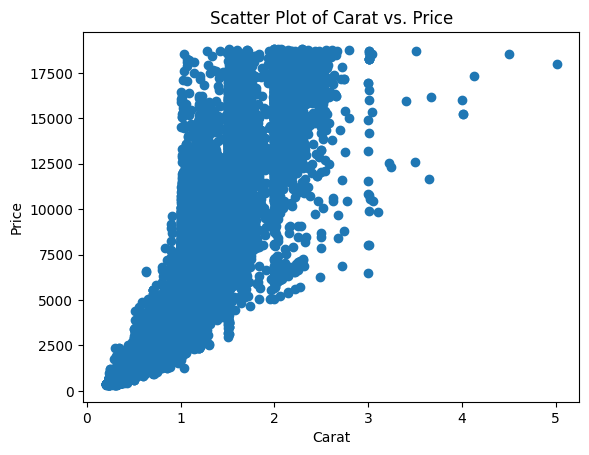

In [14]:
# Scatter plot: Shows the relationship between two numerical variables.
# Useful for identifying correlations and outliers.


import matplotlib.pyplot as plt
plt.scatter(df['carat'], df['price'])
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Scatter Plot of Carat vs. Price')
plt.show()


Insight: There's a positive correlation between carat and price, indicating that as carat weight increases, the price of the diamond generally increases. This is expected as larger diamonds are rarer and more valuable                             
Hidden Insight: The scatter plot also reveals a cluster of diamonds with higher carat weights but relatively lower prices. This could indicate the presence of diamonds with lower clarity or color grades, which affects their price despite their size.                       
 Actionable Insight: This insight can guide buyers in making informed decisions. If a buyer is on a budget but desires a larger diamond, they could consider diamonds within this cluster, accepting potential trade-offs in clarity or color.

**The scatter plot shows a strong positive, but non-linear, relationship between carat weight and price.  Larger diamonds tend to cost more, but the price increase isn't constant.  Price variation increases with carat weight, suggesting other factors influence the price of larger diamonds. Possible outliers may represent data errors or exceptional diamonds.  Further analysis, like regression and outlier detection, can reveal more insights.  The concentration of points at lower carat weights indicates a large proportion of smaller diamonds in the dataset.**

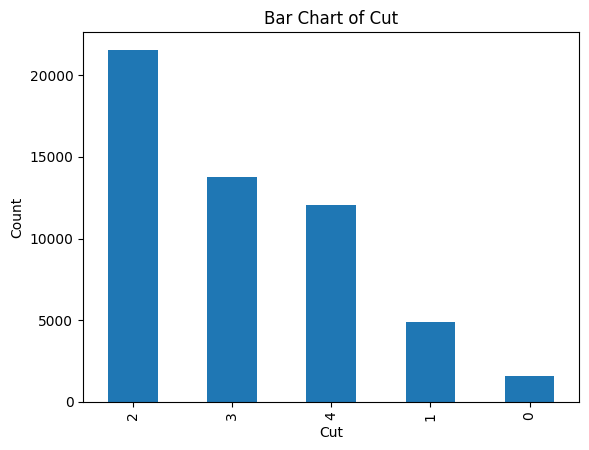

In [15]:
# Bar chart: Displays the frequency or count of different categories.
# Useful for comparing the size or proportion of different groups.


import matplotlib.pyplot as plt
df['cut'].value_counts().plot(kind='bar')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Bar Chart of Cut')
plt.show()

Insight: The 'Ideal' cut is the most frequent cut in the dataset, followed by 'Premium' and 'Very Good'. 'Fair' is the least frequent cut.                   
 Hidden Insight: This suggests that diamonds with an 'Ideal' cut are likely to be more readily available in the market compared to other cuts. It also highlights the relative rarity of diamonds with a 'Fair' cut.                                    
 Deep Insight: The dominance of 'Ideal' cut diamonds indicates their popularity in the market. This could be due to their superior light performance and brilliance, making them highly sought after. The rarity of 'Fair' cut diamonds suggests that they might be less desirable or less commonly produced.                                                                   
   Actionable Insight: This information can inform pricing strategies for diamond retailers. 'Ideal' cut diamonds could command higher prices due to their popularity, while 'Fair' cut diamonds might need to be priced more competitively to attract buyers.

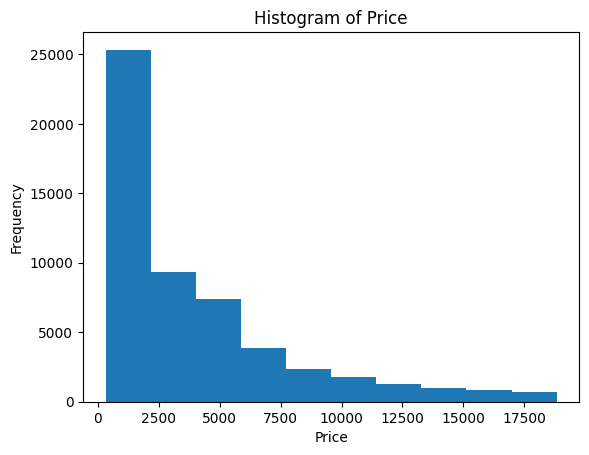

In [16]:
# Histogram: Shows the distribution of a single numerical variable.
# Useful for understanding the shape, center, and spread of the data.

import matplotlib.pyplot as plt
plt.hist(df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

Insight: The distribution of diamond prices is skewed to the right, indicating that most diamonds are priced in the lower range, with fewer diamonds having higher prices. This is a common pattern in luxury goods markets.                        
Hidden Insight: The long tail on the right side of the histogram reveals the presence of outliers, which are diamonds with significantly higher prices than the majority. These outliers could be due to factors like exceptional size, clarity, or color.                                  
  Deep Insight: The right-skewed distribution of prices reflects the luxury nature of diamonds. Most diamonds fall within a lower price range, catering to a broader market segment, while a smaller proportion of diamonds command significantly higher prices due to their exceptional qualities.
                                  
                                   
                                    
                                     
  Actionable Insight: This understanding can help businesses target specific customer segments. Luxury brands could focus on high-end diamonds with premium pricing, while more affordable brands could cater to the larger market segment seeking lower-priced diamonds.

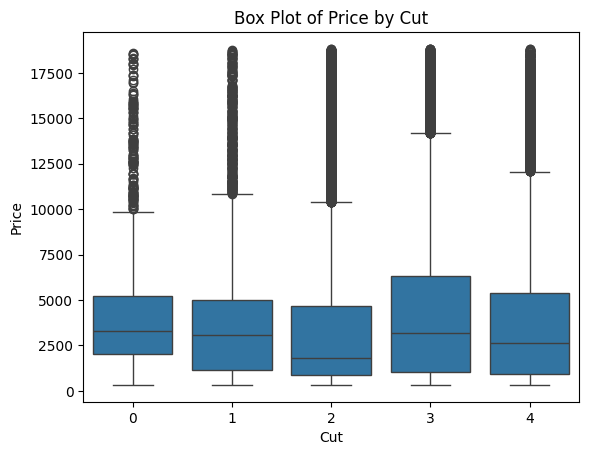

In [17]:
# Box plot Displays the distribution of a numerical variable for different categories.
# Useful for comparing the central tendency and variability of groups.

import seaborn as sns
sns.boxplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Box Plot of Price by Cut')
plt.show()

Insight: The median price of diamonds varies across different cuts, with 'Ideal' cut diamonds having a slightly higher median price compared to others.      
Hidden Insight: The box plot also shows the presence of outliers within each cut category. These outliers represent diamonds that are priced unusually high or low for their respective cuts.                  
       Deep Insight: The presence of outliers within each cut category suggests that other factors beyond cut significantly influence price. These outliers could be diamonds with exceptional clarity, color, or carat weight, exceeding the typical price range for their cut.        
           Actionable Insight: This insight highlights the importance of considering multiple factors when pricing diamonds. While cut is a key determinant of price, other characteristics like clarity, color, and carat weight can significantly impact a diamond's value.


**The box plot shows diamond price distributions for different cut categories, with category 2 having the highest median price and 0 and 4 the lowest. Price variation is greatest in categories 2 and 3.  All categories, particularly 0 and 2, have outliers representing very high-priced diamonds, likely due to factors beyond cut quality.  While cut influences price, other factors like carat, clarity, and color are also involved. Further analysis can confirm statistical significance and explore these additional factors.**

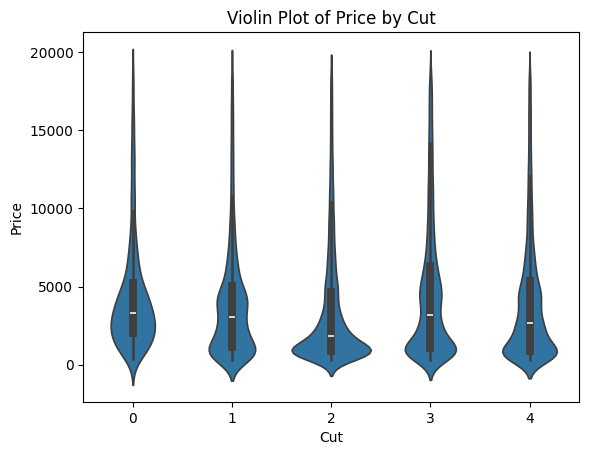

In [18]:
# Violin plot: Similar to a box plot, but also shows the density of the data.
#  Useful for visualizing the distribution of data within groups.

import seaborn as sns
sns.violinplot(x='cut', y='price', data=df)
plt.xlabel('Cut')
plt.ylabel('Price')
plt.title('Violin Plot of Price by Cut')
plt.show()

Insight: The violin plot confirms the findings from the box plot, showing the distribution of prices for each cut. 'Ideal' cut diamonds tend to have a wider price range compared to others.
                                      
                                       
Hidden Insight: The violin plot also highlights the density of diamonds at different price points within each cut. For instance, 'Ideal' cut diamonds have a higher density in the mid-price range, while 'Premium' cut diamonds have a higher density in the lower price range.        
    Deep Insight: The wider price range for 'Ideal' cut diamonds suggests that they offer a greater variety in terms of price points. This could be due to the combination of factors like carat weight, clarity, and color, resulting in a broader distribution of prices within this cut category.                
                                  
                                   
                                    
                                     
                                      
                                       
Actionable Insight: This insight can guide buyers in exploring a range of options within the 'Ideal' cut category. They can find diamonds at various price points, allowing them to balance their budget with desired qualities.

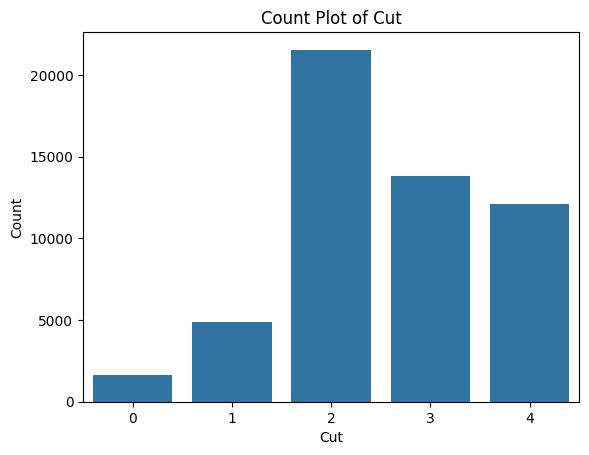

In [19]:
# Count plot: Shows the frequency of occurrences for categorical variables.
# Useful for comparing the size or proportion of different groups.

import seaborn as sns
sns.countplot(x='cut', data=df)
plt.xlabel('Cut')
plt.ylabel('Count')
plt.title('Count Plot of Cut')
plt.show()

Insight: The count plot provides a visual representation of the frequency of each cut category, reinforcing the findings from the bar chart.
                                      
                                                                    
Hidden Insight: The count plot helps in understanding the relative proportions of different cuts in the dataset, which can be valuable for market analysis and inventory management.                             
  Deep Insight: The relative proportions of different cuts can inform market analysis and inventory management. Retailers can adjust their stock levels based on the popularity of each cut, ensuring they meet customer demand.
                                                                             
  Actionable Insight: This insight helps businesses manage inventory effectively, optimizing stock levels to avoid overstocking less popular cuts and ensuring sufficient supply of high-demand cuts like 'Ideal'.

The count plot shows a skewed distribution with a dominant category ("2") and a potential secondary peak ("3").  Understanding the meaning of the "Cut" categories is crucial for interpretation.  Low counts in categories "0" and "1" may represent rare events or outliers.  The context of the data (medical, customer, financial, etc.) will significantly impact the insights. Further analysis, including statistical tests and domain expertise, is needed to uncover deeper meaning.talicized

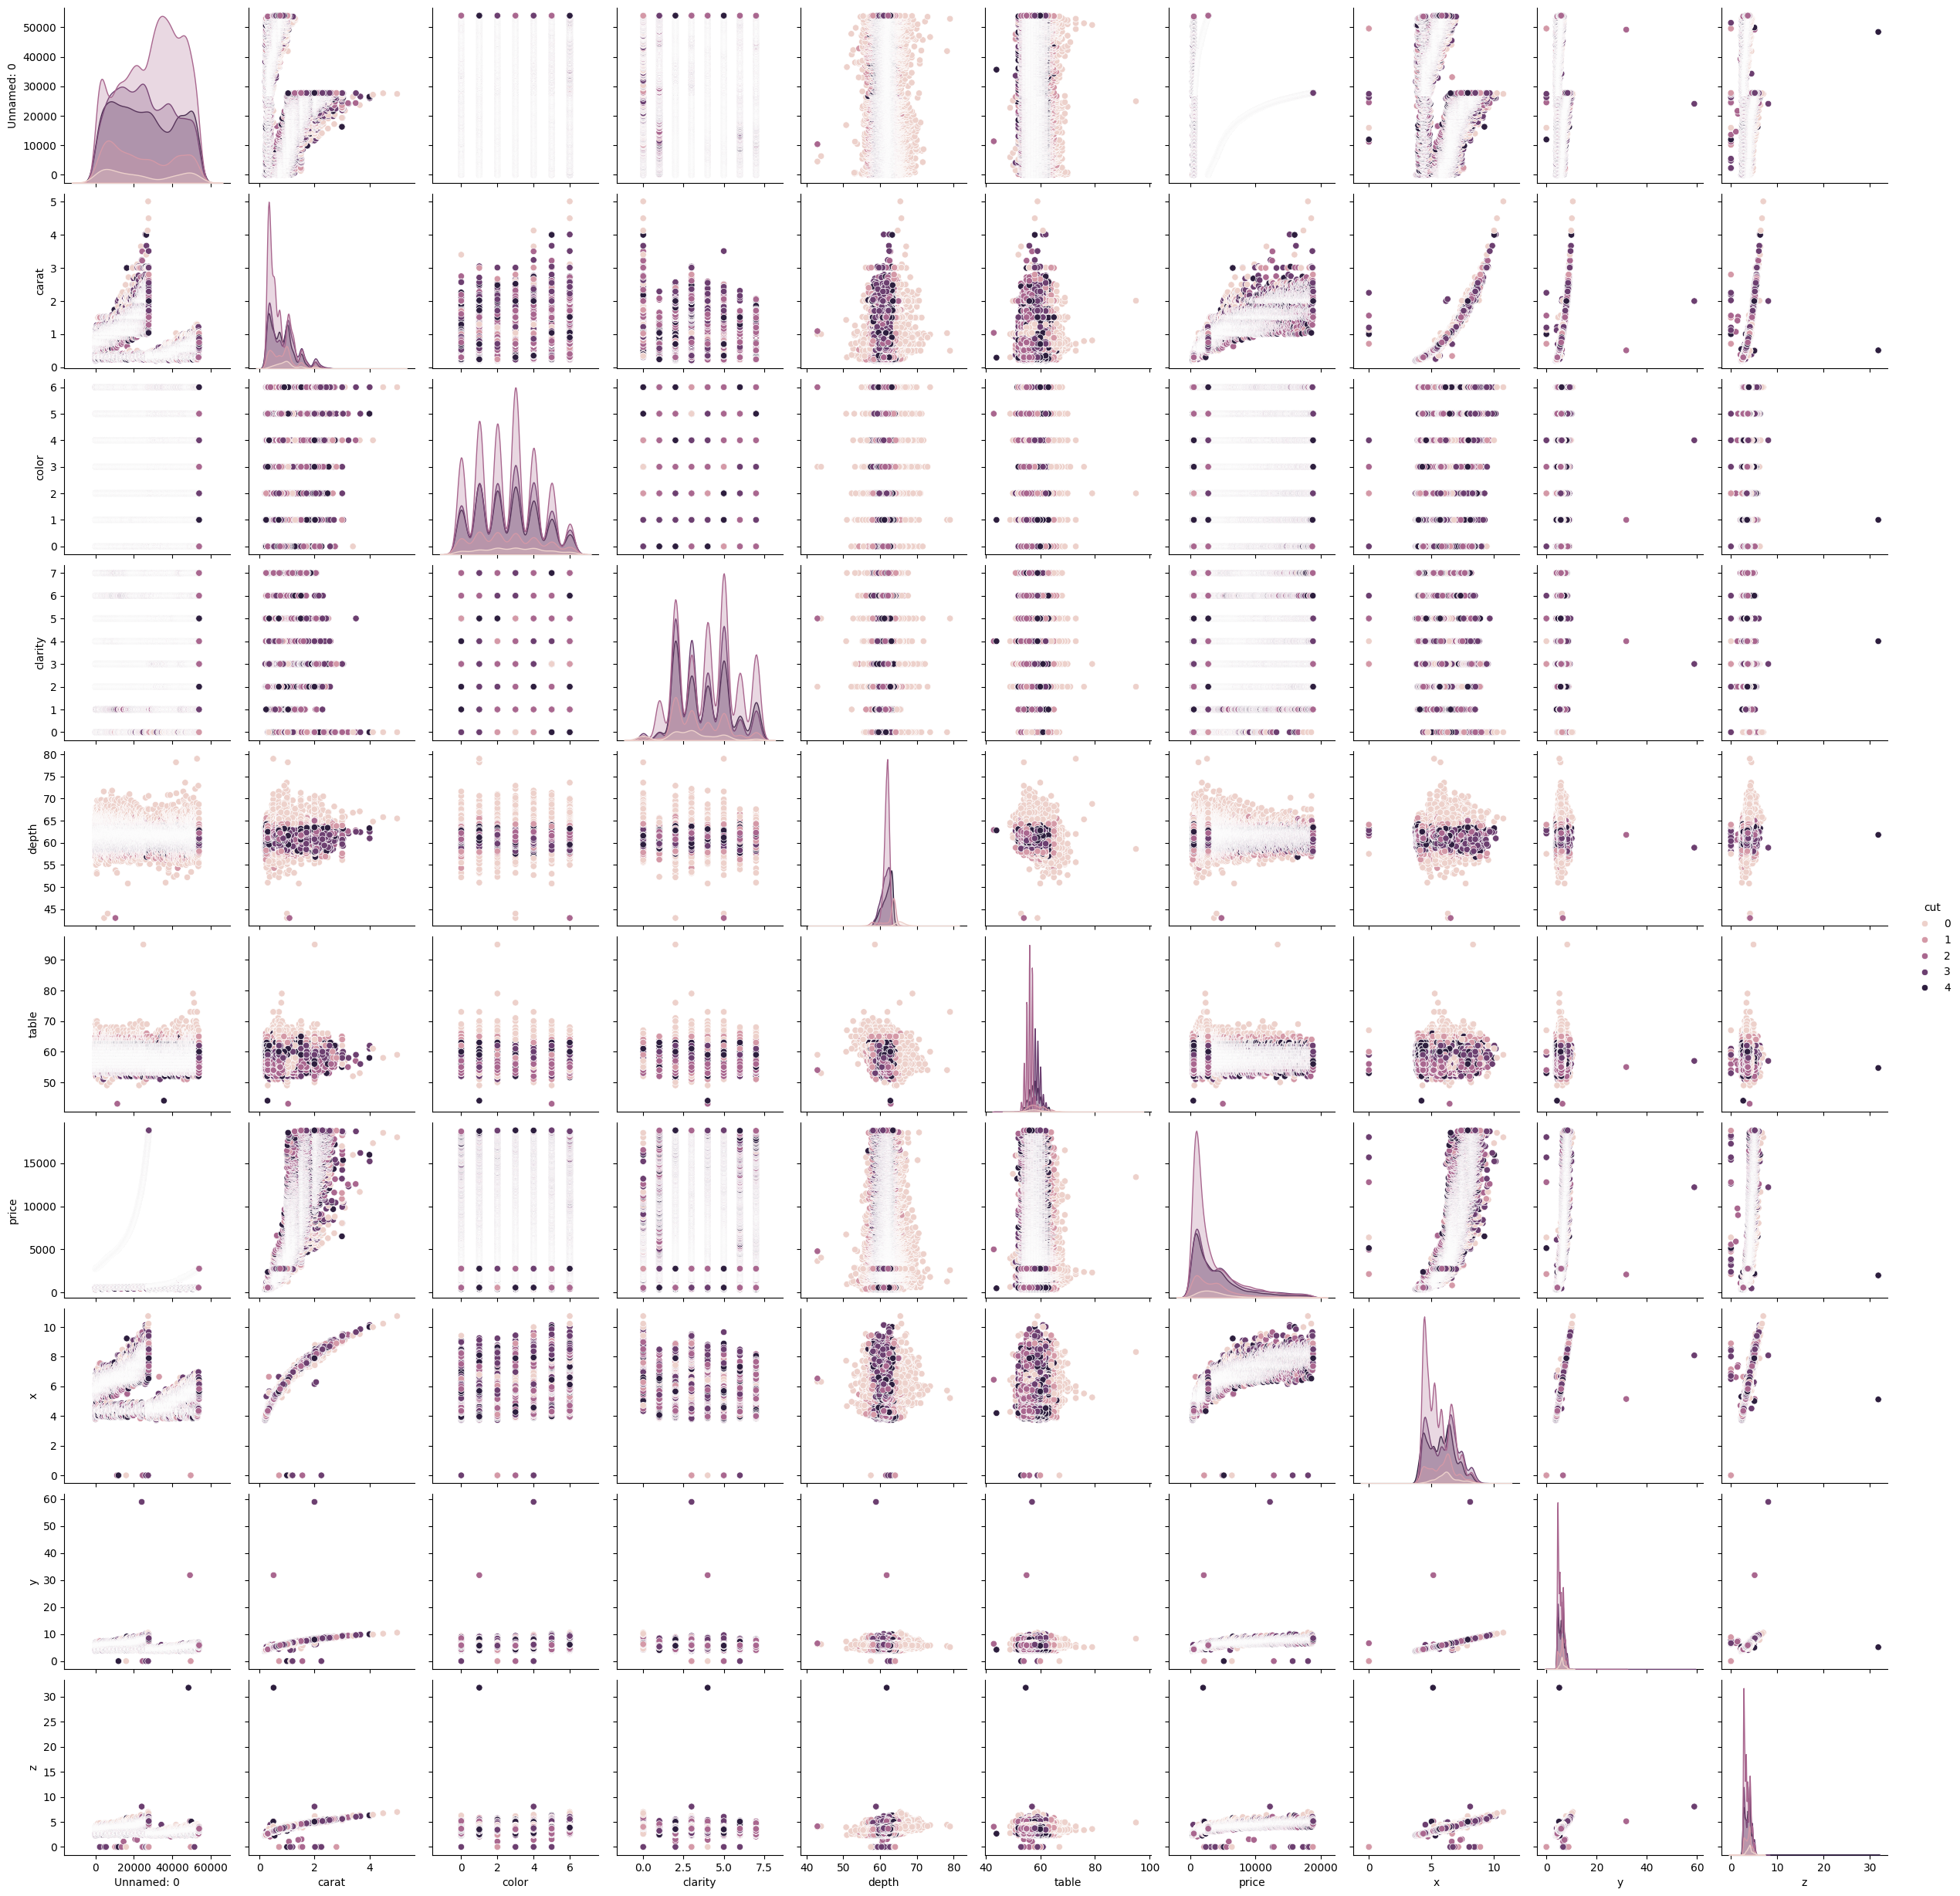

In [31]:
pair=sns.pairplot(df, hue= "cut")

We can spot outliers in these

In [21]:
df.shape

(53940, 11)

*Dropping Rows with 0 values in the x,y,z axis*

In [23]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 11)

*Dropping the rows with outliers by setting an range in the values with and greater value and a smaller value*

In [25]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]
df.shape

(53907, 11)

In [ ]:
pair=sns.pairplot(df, hue= "cut")

<Axes: >

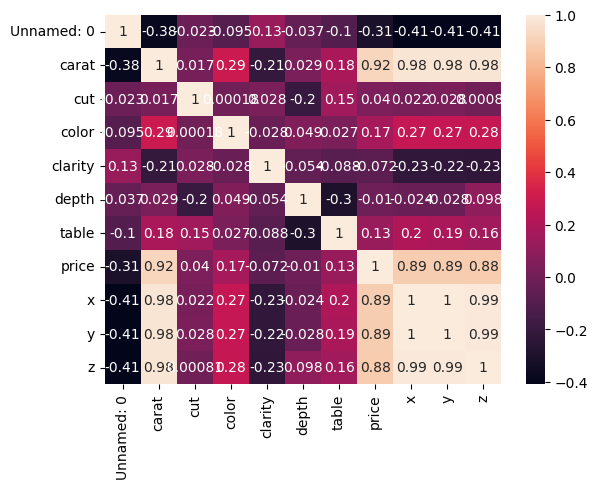

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
print(vif_data)

  feature        VIF
0   carat   4.192141
1     cut   6.996079
2   color   3.639552
3   depth  10.809099


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


In [30]:

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [31]:

y_pred = model.predict(X_test)


In [32]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2222620.3521345574
R-squared: 0.860184606152292


In [33]:
cut_encoder = LabelEncoder()

   # Fit the encoder on the entire 'cut' column
cut_encoder.fit(df['cut'])

LabelEncoder()

In [34]:

diamonds_data = df.drop(columns=['Unnamed: 0'])


cut_encoder = LabelEncoder()
color_encoder = LabelEncoder()
clarity_encoder = LabelEncoder() # Assuming 'clarity' is also a categorical feature


cut_encoder.fit(df['cut'])
color_encoder.fit(df['color'])
clarity_encoder.fit(df['clarity']) # Fit for 'clarity'

df['cut'] = cut_encoder.transform(df['cut'])
df['color'] = color_encoder.transform(df['color'])
df['clarity'] = clarity_encoder.transform(df['clarity']) # Transform 'clarity'

X = df[['carat', 'cut', 'color', 'depth']]
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model (optional)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Function to take user input and predict price
def predict_diamond_price():
    carat = float(input("Enter carat weight: "))
    cut = input("Enter cut quality (Fair, Good, Very Good, Premium, Ideal): ")
    color = input("Enter color grade (D, E, F, G, H, I, J): ")
    depth = float(input("Enter depth percentage: "))

    # Transform user input using the fitted encoders
    cut_encoded = cut_encoder.transform([cut])[0]
    color_encoded = color_encoder.transform([color])[0]

    # Create input features for prediction
    input_features = [[carat, cut_encoded, color_encoded, depth]]

    # Make prediction
    predicted_price = model.predict(input_features)[0]
    print(f"Predicted Price: ${predicted_price:.2f}")


predict_diamond_price()

Mean Squared Error: 2173534.6169925947
R-squared: 0.8568885074455899
Enter carat weight: 20
Enter cut quality (Fair, Good, Very Good, Premium, Ideal): 1
Enter color grade (D, E, F, G, H, I, J): 2
Enter depth percentage: 72
Predicted Price: $157227.54


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
